<a href="https://colab.research.google.com/github/ehpub/ML-with-Python/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_with_python_007_%EC%84%A0%ED%98%95_%EB%AA%A8%EB%8D%B8_%EA%B7%9C%EC%A0%9C_%EB%A6%AC%EC%A7%80%2C_%EB%9D%BC%EC%8F%98%2C_%EC%97%98%EB%9D%BC%EC%8A%A4%ED%8B%B1%EB%84%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/%ec%84%a0%ed%98%95-%eb%aa%a8%eb%8d%b8-%ea%b7%9c%ec%a0%9c-%eb%a6%ac%ec%a7%80-%eb%9d%bc%ec%8f%98-%ec%97%98%eb%9d%bc%ec%8a%a4%ed%8b%b1-%eb%84%b7-%eb%a8%b8%ec%8b%a0%eb%9f%ac%eb%8b%9d-with/)

## 규제

선형 모델이 학습 데이터에 민감하게 학습하였을 때 오버 피팅 현상이 발생할 수 있습니다.

이는 학습 데이터의 예측 결과는 좋으나 다른 데이터의 예측 결과는 나쁘게 나오는 현상을 말합니다.

선형 모델에서는 규제를 통해 선형 회귀 함수에 패널티를 추가하여 이러한 현상을 줄일 수 있습니다.

여기에서 패널티는 원래 선형 회귀 함수에 의한 예측값에 잡음을 넣어 왜곡시킨 값을 예측값으로 정하는 것입니다.

선형 모델에서는 크게 Lasso(L1 규제), Ridge(L2 규제), 엘라스틱 넷(L1+L2 규제) 등이 있습니다.

In [11]:
from sklearn.linear_model import LinearRegression #선형 회귀
from sklearn.preprocessing import PolynomialFeatures #다항 특성

from sklearn.model_selection import train_test_split #학습 및 테스트 데이터 분리
from sklearn.metrics import r2_score #r2 결정 계수(회귀)
from sklearn.model_selection import cross_val_score #교차 검증 점수

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings #경고
warnings.filterwarnings('ignore') #경고 무시하기

In [12]:
path = 'https://raw.githubusercontent.com/ehpub/ML-with-Python/main/subway_air_2022.csv'
df = pd.read_csv(path,encoding='cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연번       263 non-null    int64  
 1   호선       263 non-null    object 
 2   역명       263 non-null    object 
 3   미세먼지     263 non-null    float64
 4   초미세먼지    263 non-null    float64
 5   이산화탄소    263 non-null    int64  
 6   폼알데하이드   263 non-null    float64
 7   일산화탄소    263 non-null    float64
 8   데이터기준일자  263 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 18.6+ KB


In [13]:
data = df[['미세먼지','일산화탄소','폼알데하이드','이산화탄소']].values[:50]
target = df['초미세먼지'][:50].values
x_train, x_test, y_train, y_test = train_test_split(data,target)
print(y_train.shape, y_test.shape)

(37,) (13,)


In [14]:
d = 4
pf = PolynomialFeatures(degree=d,include_bias=False)
pf.fit(x_train)
x_train_p =pf.transform(x_train)
x_test_p =pf.transform(x_test)

model = LinearRegression()
model.fit(x_train_p,y_train)
pred_train = model.predict(x_train_p)
pred_test = model.predict(x_test_p)

In [15]:
df_train = pd.DataFrame(x_train,columns = ['미세먼지','일산화탄소','폼알데하이드','이산화탄소'])
df_train['target'] = y_train
df_train['pred'] =pred_train
df_train = df_train.sort_values(by='target')
df_train = df_train.reset_index()

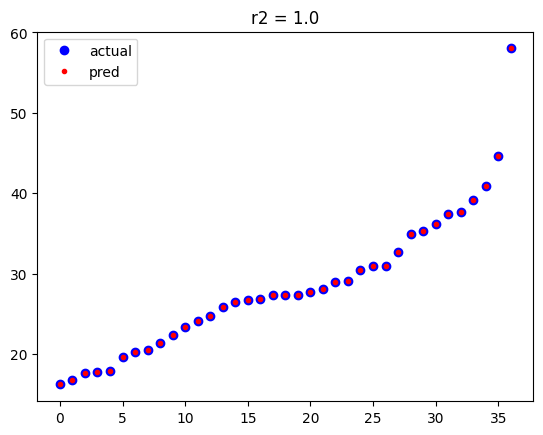

In [16]:
plt.plot(df_train['target'],'bo',label='actual')
plt.plot(df_train['pred'],'r.',label='pred')
plt.legend()
plt.title(f'r2 = {r2_score(y_train,pred_train)}')
plt.show()

In [17]:
df_test = pd.DataFrame(x_test,columns = ['미세먼지','일산화탄소','폼알데하이드','이산화탄소'])
df_test['target'] = y_test
df_test['pred'] =pred_test
df_test = df_test.sort_values(by='target')
df_test = df_test.reset_index()

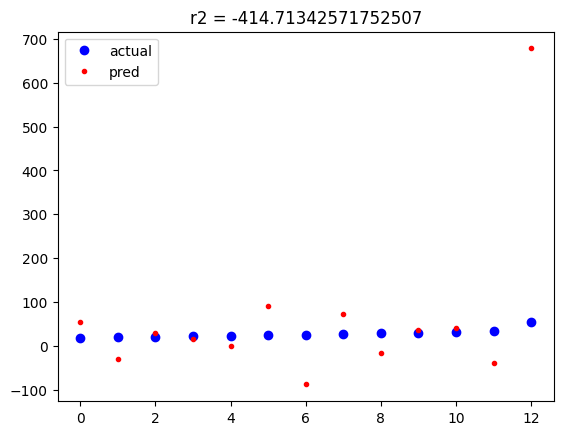

In [18]:
plt.plot(df_test['target'],'bo',label='actual')
plt.plot(df_test['pred'],'r.',label='pred')
plt.legend()
plt.title(f'r2 = {r2_score(y_test,pred_test)}')
plt.show()

## 규제

- 규제 적용하기 않은 선형 회귀 모델

규제를 적용하지 않은 선형 회귀에서는 MSE(Mean Squared Error)값이 최소인 가중치(w)와 편향(b)을 찾습니다.

loss function = MSE

- 규제를 적용한 선형 회귀 모델

규제는 MSE에 패널티(Penalty)를 부여한 값이 최소인 가중치(w)와 편향(b)을 찾습니다.

loss function = MSE+Penalty

- Lasso (L1 규제)

패널티가 가중치 합계에 알파값을 곱한 값입니다.

알파값은 패널티 규모를 정하기 위한 값으로 0이면 규제가 없는 것입니다.

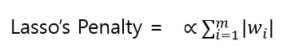

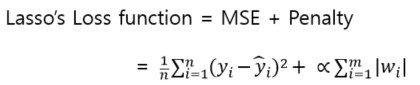

- Ridge (L2 규제)

패널티가 가중치 제곱의 합계에 알파값을 곱한 값입니다.


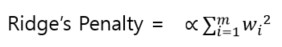

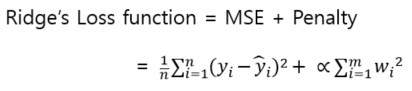

- Elastic-Net (L1 + L2 규제)

패널티가 라쏘와 리지의 패널티 합계입니다.

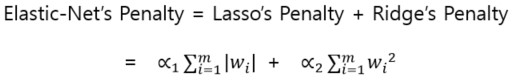

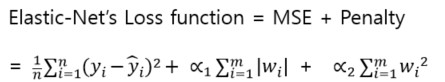

In [19]:
from sklearn.linear_model import Lasso #라쏘 L1규제
from sklearn.linear_model import Ridge #릿지 L2규제
from sklearn.linear_model import ElasticNet #엘라스틱 넷 L1+L2 규제

In [20]:
d = 4
pf = PolynomialFeatures(degree=d,include_bias=False)
pf.fit(x_train)
x_train_p =pf.transform(x_train)
x_test_p =pf.transform(x_test)

model = Lasso()
model.fit(x_train_p,y_train)
pred_train = model.predict(x_train_p)
pred_test = model.predict(x_test_p)

In [21]:
df_train = pd.DataFrame(x_train,columns = ['미세먼지','일산화탄소','폼알데하이드','이산화탄소'])
df_train['target'] = y_train
df_train['pred'] =pred_train
df_train = df_train.sort_values(by='target')
df_train = df_train.reset_index()

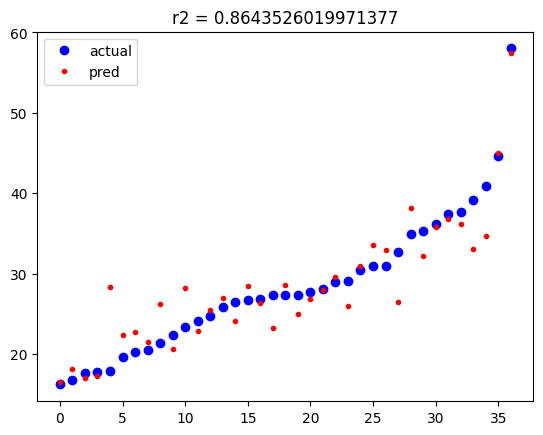

In [22]:
plt.plot(df_train['target'],'bo',label='actual')
plt.plot(df_train['pred'],'r.',label='pred')
plt.legend()
plt.title(f'r2 = {r2_score(y_train,pred_train)}')
plt.show()

In [24]:
df_test = pd.DataFrame(x_test,columns = ['미세먼지','일산화탄소','폼알데하이드','이산화탄소'])
df_test['target'] = y_test
df_test['pred'] =pred_test
df_test = df_test.sort_values(by='target')
df_test = df_test.reset_index()

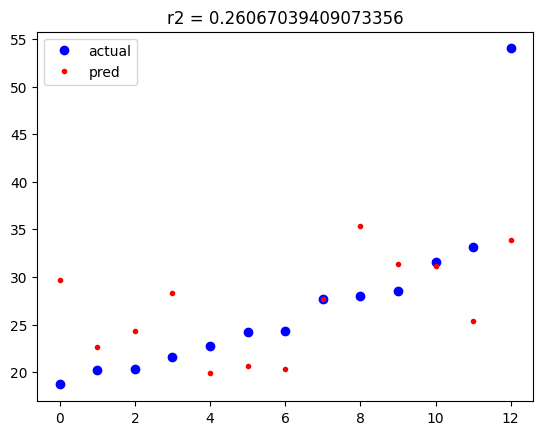

In [25]:
plt.plot(df_test['target'],'bo',label='actual')
plt.plot(df_test['pred'],'r.',label='pred')
plt.legend()
plt.title(f'r2 = {r2_score(y_test,pred_test)}')
plt.show()

In [26]:
for d in [1,2,3,4]:
  print(f"degree={d} =======================")
  pf = PolynomialFeatures(degree=d,include_bias=False)
  pf.fit(x_train)
  x_train_p =pf.transform(x_train)
  x_test_p =pf.transform(x_test)
  for a in [0.001, 0.01, 0.1, 1, 2, 5, 10]:
    print(f"alpha={a} #######")
    model = Lasso(alpha=a)
    model.fit(x_train_p,y_train)
    pred_train = model.predict(x_train_p)
    print(f"학습 r2:{r2_score(y_train, pred_train):.4f}")
    pred_test = model.predict(x_test_p)
    print(f"테스트 r2:{r2_score(y_test, pred_test):.4f}")
  print()

degree=1 =======================
alpha=0.001 #######
학습 r2:0.7861
테스트 r2:0.6771
alpha=0.01 #######
학습 r2:0.7860
테스트 r2:0.6817
alpha=0.1 #######
학습 r2:0.7800
테스트 r2:0.7031
alpha=1 #######
학습 r2:0.7748
테스트 r2:0.7446
alpha=2 #######
학습 r2:0.7668
테스트 r2:0.7596
alpha=5 #######
학습 r2:0.7660
테스트 r2:0.7523
alpha=10 #######
학습 r2:0.7632
테스트 r2:0.7421

degree=2 =======================
alpha=0.001 #######
학습 r2:0.8321
테스트 r2:0.2435
alpha=0.01 #######
학습 r2:0.8293
테스트 r2:0.1238
alpha=0.1 #######
학습 r2:0.8233
테스트 r2:0.2528
alpha=1 #######
학습 r2:0.7943
테스트 r2:0.7066
alpha=2 #######
학습 r2:0.7863
테스트 r2:0.7393
alpha=5 #######
학습 r2:0.7851
테스트 r2:0.7446
alpha=10 #######
학습 r2:0.7848
테스트 r2:0.7489

degree=3 =======================
alpha=0.001 #######
학습 r2:0.8498
테스트 r2:0.5072
alpha=0.01 #######
학습 r2:0.8503
테스트 r2:0.3512
alpha=0.1 #######
학습 r2:0.8500
테스트 r2:0.1851
alpha=1 #######
학습 r2:0.8489
테스트 r2:-0.1619
alpha=2 #######
학습 r2:0.8471
테스트 r2:-0.3076
alpha=5 #######
학습 r2:0.8442
테스트 r2:-0.1759
alpha=1

In [27]:
for d in [1,2,3,4]:
  print(f"degree={d} =======================")
  pf = PolynomialFeatures(degree=d,include_bias=False)
  pf.fit(x_train)
  x_train_p =pf.transform(x_train)
  x_test_p =pf.transform(x_test)
  for a in [0.001, 0.01, 0.1, 1, 2, 5, 10]:
    print(f"alpha={a} #######")
    model = Ridge(alpha=a)
    model.fit(x_train_p,y_train)
    pred_train = model.predict(x_train_p)
    print(f"학습 r2:{r2_score(y_train, pred_train):.4f}")
    pred_test = model.predict(x_test_p)
    print(f"테스트 r2:{r2_score(y_test, pred_test):.4f}")
  print()

degree=1 =======================
alpha=0.001 #######
학습 r2:0.7861
테스트 r2:0.6767
alpha=0.01 #######
학습 r2:0.7861
테스트 r2:0.6773
alpha=0.1 #######
학습 r2:0.7860
테스트 r2:0.6824
alpha=1 #######
학습 r2:0.7834
테스트 r2:0.6951
alpha=2 #######
학습 r2:0.7822
테스트 r2:0.6978
alpha=5 #######
학습 r2:0.7810
테스트 r2:0.7013
alpha=10 #######
학습 r2:0.7804
테스트 r2:0.7053

degree=2 =======================
alpha=0.001 #######
학습 r2:0.8329
테스트 r2:0.3303
alpha=0.01 #######
학습 r2:0.8311
테스트 r2:0.1267
alpha=0.1 #######
학습 r2:0.8297
테스트 r2:0.1016
alpha=1 #######
학습 r2:0.8251
테스트 r2:0.1813
alpha=2 #######
학습 r2:0.8215
테스트 r2:0.2089
alpha=5 #######
학습 r2:0.8165
테스트 r2:0.2668
alpha=10 #######
학습 r2:0.8133
테스트 r2:0.3395

degree=3 =======================
alpha=0.001 #######
학습 r2:0.9405
테스트 r2:-10.8871
alpha=0.01 #######
학습 r2:0.9334
테스트 r2:-3.2386
alpha=0.1 #######
학습 r2:0.9187
테스트 r2:-0.5077
alpha=1 #######
학습 r2:0.8918
테스트 r2:-0.2714
alpha=2 #######
학습 r2:0.8865
테스트 r2:-0.4399
alpha=5 #######
학습 r2:0.8823
테스트 r2:-0.6807
alp

In [28]:
for d in [1,2,3,4]:
  print(f"degree={d} =======================")
  pf = PolynomialFeatures(degree=d,include_bias=False)
  pf.fit(x_train)
  x_train_p =pf.transform(x_train)
  x_test_p =pf.transform(x_test)
  for a in [0.001, 0.01, 0.1, 1, 2, 5, 10]:
    print(f"alpha={a} #######")
    model = ElasticNet(alpha=a)
    model.fit(x_train_p,y_train)
    pred_train = model.predict(x_train_p)
    print(f"학습 r2:{r2_score(y_train, pred_train):.4f}")
    pred_test = model.predict(x_test_p)
    print(f"테스트 r2:{r2_score(y_test, pred_test):.4f}")
  print()

degree=1 =======================
alpha=0.001 #######
학습 r2:0.7861
테스트 r2:0.6781
alpha=0.01 #######
학습 r2:0.7855
테스트 r2:0.6871
alpha=0.1 #######
학습 r2:0.7808
테스트 r2:0.7015
alpha=1 #######
학습 r2:0.7777
테스트 r2:0.7309
alpha=2 #######
학습 r2:0.7731
테스트 r2:0.7499
alpha=5 #######
학습 r2:0.7665
테스트 r2:0.7568
alpha=10 #######
학습 r2:0.7652
테스트 r2:0.7486

degree=2 =======================
alpha=0.001 #######
학습 r2:0.8302
테스트 r2:0.1061
alpha=0.01 #######
학습 r2:0.8287
테스트 r2:0.1399
alpha=0.1 #######
학습 r2:0.8186
테스트 r2:0.2596
alpha=1 #######
학습 r2:0.8001
테스트 r2:0.6441
alpha=2 #######
학습 r2:0.7930
테스트 r2:0.7136
alpha=5 #######
학습 r2:0.7852
테스트 r2:0.7422
alpha=10 #######
학습 r2:0.7851
테스트 r2:0.7446

degree=3 =======================
alpha=0.001 #######
학습 r2:0.8500
테스트 r2:0.4249
alpha=0.01 #######
학습 r2:0.8504
테스트 r2:0.3605
alpha=0.1 #######
학습 r2:0.8503
테스트 r2:0.2434
alpha=1 #######
학습 r2:0.8498
테스트 r2:0.0379
alpha=2 #######
학습 r2:0.8490
테스트 r2:-0.1831
alpha=5 #######
학습 r2:0.8463
테스트 r2:-0.2880
alpha=10

- 규제 적용 전

In [30]:
for d in [1,2,3,4]:
  print(f"degree={d} =======================")
  pf = PolynomialFeatures(degree=d,include_bias=False)
  pf.fit(x_train)
  x_train_p =pf.transform(x_train)
  x_test_p =pf.transform(x_test)
  model = LinearRegression()
  model.fit(x_train_p,y_train)
  pred_train = model.predict(x_train_p)
  print(f"학습 r2:{r2_score(y_train, pred_train):.4f}")
  pred_test = model.predict(x_test_p)
  print(f"테스트 r2:{r2_score(y_test, pred_test):.4f}")
  print()

degree=1 =======================
학습 r2:0.7861
테스트 r2:0.6766

degree=2 =======================
학습 r2:0.8335
테스트 r2:0.5068

degree=3 =======================
학습 r2:0.9967
테스트 r2:-263.9885

degree=4 =======================
학습 r2:1.0000
테스트 r2:-414.7134

